In [2]:
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from textblob import TextBlob
import numpy as np
import time

## Get article links for each company through NewsAPI

In [2]:
# r = requests.get('https://www.cnbc.com/2018/10/24/reuters-america-update-3-microsoft-sales-and-profit-beat-estimates-on-cloud-growth.html?&amp;qsearchterm=microsoft%20corp')
# html = r.text
# soup = BeautifulSoup(html)
# article_content = soup.findAll('div', {'class':"group"})


# strings = ""
# for h in article_content:
#     strings += str(h)

#title = soup.find("meta",  property="article:published_time")

#title['content']


# regex = r"(?<=>).*?(?=<)"


# article = ''
# matches = re.finditer(regex, strings, re.MULTILINE)

# for match in matches:
#     article += match.group()



In [3]:
def time_content(links):
    time_content = {}
    for link in links:
        r = requests.get(link)
        html = r.text
        soup = BeautifulSoup(html)
        article_content = soup.findAll('div', {'class':"group"})
        strings = ""
        for h in article_content:
            strings += str(h)
        
        regex = r"(?<=>).*?(?=<)"
        article = ''
        matches = re.finditer(regex, strings, re.MULTILINE)
        for match in matches:
            article += match.group()
        
        title = soup.find("meta",  property="article:published_time")
        if title is None:
            time = 0
        else:
            time = title["content"]
                
        time_content.update({time : article})
        
        
    return time_content

In [4]:
# article

# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# import pandas as pd

# driver = webdriver.Firefox()
# driver.get("https://www.cnbc.com/search/?query=microsoft%20corp&qsearchterm=microsoft%20corp")
# # assert "Python" in driver.title

# continue_link = driver.find_element_by_class_name('resultlink')
# # print(continue_link.get_attribute('href'))

# for i in range(1,400):
#     driver.execute_script("window.scrollTo(0,   document.body.scrollHeight);")
#     time.sleep(1)
# html_source = driver.page_source
# data = html_source.encode('utf-8')

# driver.quit()

# data = data.decode("utf-8") 

# links = []

# import re

# regex = r"(?<=\"resultlink\" style=\"color:black;\" href=\").*?(?=\">)"

# matches = re.finditer(regex, data, re.MULTILINE)

# for match in matches:
    
#     links.append(match.group())

# df_links = pd.DataFrame(links, columns=['links'])
# df_links.to_pickle('microsoft_links.pkl')

In [35]:
#read file that contains 2000 saved links on microsofts articles from CNBC
ms_links = pd.read_pickle('microsoft_links.pkl')

#turns links to a list
ms_links = ms_links['links'].to_list()

#scrape content of each link
microsoft_content = time_content(ms_links[0:1500])

#put into a DataFrame
df_articles = pd.DataFrame(microsoft_content.items(), columns=['Date', 'Content'])

In [6]:
# df_articles.to_csv('microsoft_articles.csv')
# df_articles = pd.read_csv('microsoft_articles.csv')
# df_articles = df_articles.drop(columns = 'Unnamed: 0')
# len(microsoft_content)
# df_articles.head()
# df_articles1 = df_articles.iloc[:100, :]
# df_articles1.loc[df_articles1.Content.str.contains("foo", na=False)]

In [39]:
df_articles.loc[df_articles.Content.str.contains("foo", na=False)]

,Date,Content
25,2019-01-17T15:54:34-0500,Microsoft does business with many U.S. governm...
73,2019-02-04T13:19:00-0500,"(New throughout, adds details on timing)Feb 4 ..."
76,2019-02-04T13:13:28-0500,Amazon CEO Jeff Bezos was seen in attendance a...
101,2018-11-06T09:00:01-0500,Microsoft's refreshed campus is scheduled to o...
104,2019-02-01T14:58:24-0500,"I ask Siri, Google Assistant, Amazon Alexa and..."
113,2018-10-30T16:23:32-0400,Facebook has drafted plans for plans for a 650...
122,2019-01-31T07:57:32-0500,Check out the companies making headlines befor...
123,2018-10-08T19:00:38-0400,Tech giant Microsoft said it will invest an un...
134,2018-10-02T12:34:13-0400,Assuming that 2 percent of servers one day run...
203,2018-08-03T09:10:07-0400,Starbucks is partnering with Microsoft and ICE...


In [48]:
increase = df_articles.iloc[[6, 9, 15]]

In [45]:
# increase = df_articles[df_articles1['Content'].str.contains("increase")]
#6 is weakly positive
#9 is negative
#15 is positive

In [49]:
increase['positivity'] = increase['Date']
increase = increase.drop(columns='Date')

increase['text'] = increase['Content']
increase = increase.drop(columns='Content')

increase['positivity'][15] = 3
increase['positivity'][6] = 4
increase['positivity'][9] = 1
# increase = increase.drop([ 0, 8, 18 , 29, 38, 39, 45, 50, 63, 69, 70, 74, 75, 77, 83, 87])

#5 is neutral, 6-7 is weakly positive, 8-9 is positive, 3-4 weakly negative, 1-2 is negative

#1 is negative, 2 weakly negative, 3 is positive, 4 is weakly positive, 5 is neutral

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
increase

,positivity,text
6,4,Microsoft's longer-term cloud contracts are fo...
9,1,Microsoft's revenue was slightly below consens...
15,3,"Confluent, which commercializes the Apache Kaf..."


In [8]:
# response = requests.get("https://newsapi.org/v2/everything?q=microsoft&sources=reuters&pageSize=100&apiKey=04fa90910183440c97c0e04751bc72c4")
# microsoft_news_json = response.json()
# microsoft_art = microsoft_news_json['articles']


# def get_time_links(json):
#     dicts = {}
#     for x in range(0,100):
#         time = json['articles'][x]['publishedAt']
#         url = json['articles'][x]['url']
#         dicts.update( { time : url} )
#     return dicts

# microsoft_links = get_time_links(microsoft_news_json)
# len(microsoft_links)


# def clean_time(links):  
#     empty = {}
#     for key, value in links.items():
#             datetime = key.split('T')
#             time = datetime[1].strip('Z')
#             datetime[1] = time
#             datetime = ' '.join(datetime)
#             empty.update({datetime : value})
#     return empty

#cleaned_micro_links = clean_time(microsoft_links)

## Scrape Article Content

In [51]:
def get_content(urls_list):
    article_contents = {}
    for key, value in urls_list.items():
        r = requests.get(value)
        html = r.text
        soup = BeautifulSoup(html)
        foundp = soup.findAll('p')
        
        content = str()
        for para in foundp:
            text = para.text
            string_text = str(text)
            content += string_text
        article_contents.update({key : content})
    return article_contents
#         article_contents.append(content)
#     return article_contents
        

In [11]:
# microsoft_content = get_content(cleaned_micro_links)

# list(microsoft_content.keys())[0]

## Get Stock Prices API

In [52]:
r = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&apikey=TZZ9RPNH9YGP8SXX&datatype=json')
microsoft_prices = r.json()

In [53]:
microsoft_prices['Time Series (Daily)']['2019-02-05']

{'1. open': '106.0600',
 '2. high': '107.2700',
 '3. low': '105.9600',
 '4. close': '107.2200',
 '5. adjusted close': '107.2200',
 '6. volume': '27325365',
 '7. dividend amount': '0.0000',
 '8. split coefficient': '1.0000'}

In [54]:
URL = "https://www.alphavantage.co/query?"
PARAMS = { 'function' : 'TIME_SERIES_Daily', 'symbol':'MSFT', 'outputsize':'full','datatype':'json', 'apikey':'TZZ9RPNH9YGP8SXX'}

response = requests.get(URL,PARAMS)

x = response.json()

spy_df = pd.DataFrame(x['Time Series (Daily)'])

print('close: ', x['Time Series (Daily)']['2019-02-05']['4. close'])
print('open: ', x['Time Series (Daily)']['2019-02-05']['1. open'])

close:  107.2200
open:  106.0600


&nbsp;

## Get Sentiment each article

In [15]:
# blob = TextBlob(list(microsoft_content.values())[0])
# polarity = blob.sentiment.polarity, blob.sentiment.subjectivity
# list(polarity)

# for key, value in microsoft_content.items():
#     blob = TextBlob(value)
#     polarity = blob.sentiment.polarity, blob.sentiment.subjectivity
#     sentiment = list(polarity)
#     print(sentiment)
#     if sentiment[0] > .05:
#         print(value)
#         print(sentiment[0])

# import mediacloud.api
# mc = mediacloud.api.MediaCloud('9bdec5b06584ca67419e76e8d9cc3997e40f9184e14e1af7251fc5ee7b753672')
# res = mc.storyCount('Microsoft AND tags_id_media:58722749', 'publish_date:[NOW-1YEAR TO NOW]')
# print(res['count'])

In [55]:
#read csv datasets
csv = pd.read_csv('datasets/us-economic-newspaper.csv', encoding="ISO-8859-1")
csv2 = pd.read_csv('datasets/dataset2.csv', encoding = "ISO-8859-1")


csv = csv.loc[csv['positivity:confidence'] > .5]
csv2 = csv2.loc[csv2['positivity:confidence'] > .5]


csv['positivity'] = csv['positivity'].replace(2, 1)
csv['positivity'] = csv['positivity'].replace([3, 4], 2)
csv['positivity'] = csv['positivity'].replace([6, 7], 4)
csv['positivity'] = csv['positivity'].replace([8, 9], 3)

csv2['positivity'] = csv2['positivity'].replace(2, 1)
csv2['positivity'] = csv2['positivity'].replace([3, 4], 2)
csv2['positivity'] = csv2['positivity'].replace([6, 7], 4)
csv2['positivity'] = csv2['positivity'].replace([8, 9], 3)


#5 is neutral, 6-7 is weakly positive, 8-9 is positive, 3-4 weakly negative, 1-2 is negative

#1 is negative, 2 weakly negative, 3 is positive, 4 is weakly positive, 5 is neutral

print(csv2['positivity'].unique())

# len(csv.loc[csv['positivity'] == 3])

[2. 4. 5. 1. 3.]


In [56]:
# csv.columns
csv = csv.drop(columns= ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'orig__golden', 'articleid', 'date', 'headline',
       'lineid', 'next_sentence', 'positivity_gold', 'previous_sentence',
       'relevance_gold'])

# csv2.columns
csv2 = csv2.drop(columns= ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at','positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold'])

csv2.head()

,positivity,text
0,2.0,NEW YORK -- Yields on most certificates of dep...
5,2.0,"Stocks declined, as investors weighed slower-t..."
9,2.0,The U.S. dollar declined against most major fo...
17,2.0,"NEW YORK -- The dollar sagged yesterday, as ne..."
20,4.0,"The technology industry, an engine of innovati..."


In [57]:
#take out null values
df = csv[np.isfinite(csv['positivity'])]
df2 = csv2[np.isfinite(csv2['positivity'])]

#reset index
df = df.reset_index()
df2 = df2.reset_index()

#drop index
df = df.drop(columns = 'index')
df2 = df2.drop(columns = 'index')

#add the two datasets
df = df.append(df2)

df['positivity'] = df['positivity'].astype(int)

df = df.append([increase], ignore_index = True)

df['positivity'] = df['positivity'].astype(int)

len(df)

1905

&nbsp;

## NLTK: Natural Language Tool Kit

In [58]:
import nltk
import sklearn

from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
from nltk.stem.snowball import SnowballStemmer

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# stop words
from nltk.corpus import stopwords
stopwords.words("english")

stop_words = set(stopwords.words('english'))

# stem words
stemmer = SnowballStemmer("english")


#tokenize the text in the article content
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: nltk.regexp_tokenize(x, pattern))
df['text'] = df['text'].apply(lambda x: [w for w in x if not w in stop_words])
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])
df['text'] = df['text'].apply(lambda x: ' '.join(x))

print(df.columns)
y = df['positivity']
X = df['text']

Index(['positivity', 'text'], dtype='object')


## Test-Train Split

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


#test train split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tfidf = TfidfVectorizer()

#vectorize the train and test
x_train_tfidf = tfidf.fit_transform(X_train)

# X_train = pd.DataFrame(train_df.toarray(), columns=tfidf.get_feature_names())

X_test_tfidf = tfidf.transform(X_test)

In [60]:
X_train = pd.DataFrame(x_train_tfidf.toarray(), columns=tfidf.get_feature_names())
X_test = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names())

## PCA

In [637]:
# from sklearn.decomposition import PCA

# pca_X_train = pd.DataFrame(X_train, columns=tfidf.get_feature_names())
# pca_X_test = pd.DataFrame(X_test, columns=tfidf.get_feature_names())

# pca = PCA(.95)

# X_train = pca.fit_transform(pca_X_train)

# X_test = pca.transform(pca_X_test)

# pca.n_components_

## Train Models

In [61]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

lsvc_classifier = LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)

lsvc_classifier.fit(X_train, y_train)
lsvc_train_preds = lsvc_classifier.predict(X_train)
lsvc_test_preds = lsvc_classifier.predict(X_test)

lsvc_train_score = accuracy_score(y_train, lsvc_train_preds)
lsvc_test_score = accuracy_score(y_test, lsvc_test_preds)

print('LinearSVC')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lsvc_train_score, lsvc_test_score))
print("F1 Score: {}".format(f1_score(y_test, lsvc_test_preds, average='micro')))

LinearSVC
Training Accuracy: 1.0 		 Testing Accuracy: 0.5696
F1 Score: 0.5695538057742782


In [62]:
lsvc2_classifier = LinearSVC(C=0.5, dual=True, loss="squared_hinge", penalty="l2", tol=0.001)
lsvc2_classifier.fit(X_train, y_train)
lsvc2_train_preds = lsvc2_classifier.predict(X_train)
lsvc2_test_preds = lsvc2_classifier.predict(X_test)

lsvc2_train_score = accuracy_score(y_train, lsvc2_train_preds)
lsvc2_test_score = accuracy_score(y_test, lsvc2_test_preds)

print('LinearSVC')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lsvc2_train_score, lsvc2_test_score))
print("F1 Score: {}".format(f1_score(y_test, lsvc_test_preds, average='micro')))

LinearSVC
Training Accuracy: 0.9573 		 Testing Accuracy: 0.6142
F1 Score: 0.5695538057742782


In [63]:
x = 'Amazon beat on earnings and revenues—here’s what three experts are saying about the stock now Amazon beat on earnings and revenues—here’s what five experts are saying about the stock now   11:30 AM ET Fri, 1 Feb 2019 | 04:22 Amazon cloud-computing division said revenue jumped 45 percent in the fourth quarter, as the company continued to cement its lead over Microsoft and Google.  Sales at Amazon Web Services climbed to $7.43 billion from $5.11 billion a year ago, topping the $7.29 billion consensus estimate among analysts polled by FactSet. AWS revenue represented 10 percent of total quarterly sales at Amazon.  The cloud business has become crucial to the success of its parent, not only for revenue but also for profits.  Operating income for AWS in the quarter was $2.18 billion, exceeding the $2.09 billion FactSet consensus estimate. The unit accounted for 58 percent of Amazons overall operating income. AWS operating margin was 29 percent, shrinking from 31 percent the prior quarter.  LIVE, NEWS-MAKING DISCUSSIONS UNIQUE, IN-PERSON EXPERIENCES LEARN MORE + JOIN US   Gene Munsters key takeaways from Amazons quarter Gene Munsters key takeaways from Amazons quarter   5:44 PM ET Thu, 31 Jan 2019 | 05:24 "We are getting more and more creative around getting efficiency up and getting our cost of acquisition down," Amazons chief financial officer, Brian Olsavsky, told analysts on the companys quarterly earnings call on Thursday.  AWS beat Microsoft and Google to the market for cloud infrastructure, which companies use to outsource their computing and data storage needs, and has held onto its lead.  However, Microsofts business is growing faster, even though its still smaller than AWS. The software company said on Wednesday that Azure cloud revenue grew 76 percent in the latest quarter.  Brian Weiser, an analyst at Pivotal Research Group, had estimated that AWS would generate fourth-quarter revenue of $7.41 billion.  "With substantial upside potential for AWS and a strong track record, we think we can safely assume significant ongoing revenue growth for the foreseeable future," wrote Weiser, who initiated Amazon coverage with a "buy" rating earlier this month.  AWS big announcements in the period included the introduction of new computing instances that rely on ARM-based server chips, custom-built chips for accelerating artificial-intelligence work and a plan to offer hardware equipped with AWS software for corporate data centers.'
        
        
        

In [64]:
def text_cleaner(description):
    '''uses regex to tokenize words and capture them from the description, 
    lowers the capitilization remove stop words, reduce to stem words, 
    and joins them all in a string'''
    tokens_raw = nltk.regexp_tokenize(description, pattern)
    tokens = [i.lower() for i in tokens_raw]
    tokens_stopped = [w for w in tokens if not w in stop_words]
    stemmed = [stemmer.stem(word) for word in tokens_stopped]
    cleaned = ' '.join(stemmed)
    return cleaned



def dict_cleaner(dictionary):
    '''iterates through the dictionary values in each key (category) 
    and cleans each description and adds it back to a new list'''
    description_list = []
    for c, d in dictionary.items():
        for description in d:
            cleaned = text_cleaner(description)
            description_list.append(cleaned)
    return description_list


def vc_predict_app(x):    
    x_trial = text_cleaner(x)
    
    x_vect = tfidf.transform([x_trial])

    df_predict = pd.DataFrame(x_vect.toarray(), columns=tfidf.get_feature_names())

    return lsvc2_classifier.predict(df_predict)[0]

vc_predict_app(x)

4

In [65]:
# numbers = {}
# for key, value in microsoft_content.items():
#     number = vc_predict_app(value)
#     numbers.update({key : number})
    

In [66]:
# numbers

## KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

knn_train_score = accuracy_score(y_train, knn_train_preds)
knn_test_score = accuracy_score(y_test, knn_test_preds)

print("KNN")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(knn_train_score, knn_test_score))
print("F1 Score: {}".format(f1_score(y_test, knn_test_preds, average='micro')))

KNN
Training Accuracy: 0.643 		 Testing Accuracy: 0.5538
F1 Score: 0.5538057742782152


In [68]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("F1 Score: {}".format(f1_score(y_test, nb_test_preds, average='micro')))

Multinomial Naive Bayes
Training Accuracy: 0.6004 		 Testing Accuracy: 0.5591
F1 Score: 0.5590551181102362


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=50)

rf_classifier.fit(X_train, y_train)
rf_train_preds = rf_classifier.predict(X_train)
rf_test_preds = rf_classifier.predict(X_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("F1 Score: {}".format(f1_score(y_test, rf_test_preds, average='micro')))

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.6142
F1 Score: 0.6141732283464567


In [647]:
# RandomForestClassifier.predict(

In [70]:
from sklearn import svm

svm_clf = svm.SVC(probability=True)

svm_clf.fit(X_train, y_train)
svm_train_preds = rf_classifier.predict(X_train)
svm_test_preds = rf_classifier.predict(X_test)

svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

print('SVM')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(svm_train_score, svm_test_score))
print("F1 Score: {}".format(f1_score(y_test, svm_test_preds, average='micro')))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM
Training Accuracy: 1.0 		 Testing Accuracy: 0.6142
F1 Score: 0.6141732283464567


In [74]:
from sklearn.ensemble import GradientBoostingClassifier


gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)

gb_clf.fit(X_train, y_train)
gb_train_preds = gb_clf.predict(X_train)
gb_test_preds = gb_clf.predict(X_test)

gb_train_score = accuracy_score(y_train, gb_train_preds)
gb_test_score = accuracy_score(y_test, gb_test_preds)

print('Gradient Boosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(gb_train_score, gb_test_score))
print("F1 Score: {}".format(f1_score(y_test, gb_test_preds, average='micro')))

Gradient Boosting
Training Accuracy: 0.6588 		 Testing Accuracy: 0.5984
F1 Score: 0.5984251968503937


In [650]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier()

adaboost_clf.fit(X_train, y_train)
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

adaboost_train_score = accuracy_score(y_train, adaboost_train_preds)
adaboost_test_score = accuracy_score(y_test, adaboost_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(adaboost_train_score, adaboost_test_score))
print("F1 Score: {}".format(f1_score(y_test, adaboost_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.5492 		 Testing Accuracy: 0.5039
F1 Score: 0.5039370078740157


In [651]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_train_preds = xgb_clf.predict(X_train)
xgb_test_preds = xgb_clf.predict(X_test)

xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))
print("F1 Score: {}".format(f1_score(y_test, xgb_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.7631 		 Testing Accuracy: 0.6194
F1 Score: 0.6194225721784777


## Voting Classifier

In [653]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc1 = LinearSVC(C=25.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.001)
svc2 = LinearSVC(C=1.0, dual=True, loss="hinge", penalty="l2", tol=1e-05)
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)


vc_clf = VotingClassifier(estimators=[('lsvc2_classifier', lsvc2_classifier),
                                      ('lsvc_classifier', lsvc_classifier),
                                      ('knn', knn),
#                                     ('svc1', svc1), 
#                                      ('svc2', svc2),
                                     ('gb_clf', gb_clf),
                                      ('xgb_clf', xgb_clf),
#                                     ('nb', nb_classifier),
                                     ('rf_classifier', rf_classifier),
                                      ('svm_clf', svm_clf)
                                     ], voting='hard')

vc_clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lsvc2_classifier', LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)), ('lsvc_classifier', LinearSVC(C=10.0, class_weight=...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [654]:
vc_train_preds = vc_clf.predict(X_train)
vc_test_preds = vc_clf.predict(X_test)

vc_train_score = accuracy_score(y_train, vc_train_preds)
vc_test_score = accuracy_score(y_test, vc_test_preds)

print('Voting Classifier')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(vc_train_score, vc_test_score))
print("F1 Score: {}".format(f1_score(y_test, vc_test_preds, average='micro')))

Voting Classifier
Training Accuracy: 0.8399 		 Testing Accuracy: 0.6457
F1 Score: 0.6456692913385826


In [656]:
import pickle
pickling_on = open("vc_clf.pickle","wb")
pickle.dump(vc_clf, pickling_on)
pickling_on.close()

In [154]:
from tpot import TPOTClassifier
from tpot.config import classifier_config_sparse


tpot = TPOTClassifier(generations=3,
                      config_dict=classifier_config_sparse ,
                      cv = 3 ,
                      population_size=1,
#                       max_eval_time_mins=10, 
                      verbosity=3,
#                      periodic_checkpoint_folder='foldername'
                     )


#we ran the classifier, which will tell us the best model to use.
tpot.fit(X_train, y_train)
# tpot.export('filename.py')

13 operators have been imported by TPOT.


Generation 1 - Current Pareto front scores:
-1	0.545904146637939	KNeighborsClassifier(CombineDFs(input_matrix, input_matrix), KNeighborsClassifier__n_neighbors=67, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=uniform)

Generation 2 - Current Pareto front scores:
-1	0.545904146637939	KNeighborsClassifier(CombineDFs(input_matrix, input_matrix), KNeighborsClassifier__n_neighbors=67, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=uniform)
-2	0.549867059975384	KNeighborsClassifier(CombineDFs(SelectFwe(input_matrix, SelectFwe__alpha=0.033), input_matrix), KNeighborsClassifier__n_neighbors=67, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=uniform)

Skipped pipeline #4 due to time out. Continuing to the next pipeline.
Generation 3 - Current Pareto front scores:
-1	0.545904146637939	KNeighborsClassifier(CombineDFs(input_matrix, input_matrix), KNeighborsClassifier__n_neighbors=67, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=uniform)
-2	0.549867059975

TPOTClassifier(config_dict={'tpot.builtins.OneHotEncoder': {'minimum_fraction': [0.05, 0.1, 0.15, 0.2, 0.25]}, 'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 101), 'weights': ['uniform', 'distance'], 'p': [1, 2]}, 'sklearn.ensemble.RandomForestClassifier': {'n_estimators': [100], 'criterion': [...0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'min_child_weight': range(1, 21), 'nthread': [1]}},
        crossover_rate=0.1, cv=3, disable_update_check=False,
        early_stop=None, generations=3, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=None, periodic_checkpoint_folder=None,
        population_size=1, random_state=None, scoring=None, subsample=1.0,
        use_dask=False, verbosity=3, warm_start=False)

In [155]:
tpot.export('file.py')

True

## Confusion Matrix

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, vc_test_preds)
cate = df.keys()


NameError: name 'vc_test_preds' is not defined

In [73]:
cm = confusion_matrix(y_test, vc_test_preds)
cate = df['positivity'].unique()
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, cate)

#5 is neutral, 6-7 is weakly positive, 8-9 is positive, 3-4 weakly negative, 1-2 is negative

#1 is negative, 2 weakly negative, 3 is positive, 4 is weakly positive, 5 is neutral

NameError: name 'vc_test_preds' is not defined

## Predicting Article Sentiment

In [659]:
# microsoft_content = time_content(ms_links[0:500])

#put into a DataFrame
df_articles = pd.DataFrame(microsoft_content.items(), columns=['Date', 'Content'])

In [1]:
microsoft_content

NameError: name 'microsoft_content' is not defined

In [685]:
dfc = df_articles.copy()

In [686]:
dfc.head()

,Date,Content
0,2019-01-30T19:04:00-0500,(Adds revenue outlook)Jan 30 (Reuters) - Micro...
1,2019-01-30T16:58:00-0500,"fall@ (Adds CEO and analyst comments, backgrou..."
2,2019-02-04T08:13:39-0500,Satya Nadella became Microsoft's CEO on Feb. 4...
3,2019-02-04T13:35:00-0500,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...
4,2019-01-30T16:21:00-0500,"fall@ (Compares with estimates, adds backgroun..."


In [687]:
vc_predict_app(dfc.Content[0])

4

In [688]:
dfc['positivity'] = dfc['Content'].apply(lambda x: vc_predict_app(x))

In [689]:
dfc = dfc[dfc.Date != 0]

In [690]:
dfc['Date'] = dfc['Date'].apply(lambda x: str(x).split('T'))

In [691]:
dfc.head()

,Date,Content,positivity
0,"[2019-01-30, 19:04:00-0500]",(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4
1,"[2019-01-30, 16:58:00-0500]","fall@ (Adds CEO and analyst comments, backgrou...",4
2,"[2019-02-04, 08:13:39-0500]",Satya Nadella became Microsoft's CEO on Feb. 4...,4
3,"[2019-02-04, 13:35:00-0500]",APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4
4,"[2019-01-30, 16:21:00-0500]","fall@ (Compares with estimates, adds backgroun...",4


In [692]:
dfc['Time'] = dfc['Date'].apply(lambda x: x[1].split(':'))

In [693]:
dfc.head()

,Date,Content,positivity,Time
0,"[2019-01-30, 19:04:00-0500]",(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4,"[19, 04, 00-0500]"
1,"[2019-01-30, 16:58:00-0500]","fall@ (Adds CEO and analyst comments, backgrou...",4,"[16, 58, 00-0500]"
2,"[2019-02-04, 08:13:39-0500]",Satya Nadella became Microsoft's CEO on Feb. 4...,4,"[08, 13, 39-0500]"
3,"[2019-02-04, 13:35:00-0500]",APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,"[13, 35, 00-0500]"
4,"[2019-01-30, 16:21:00-0500]","fall@ (Compares with estimates, adds backgroun...",4,"[16, 21, 00-0500]"


In [694]:
dfc['Date'] = dfc['Date'].apply(lambda x: x[0])

In [695]:
dfc.head()

,Date,Content,positivity,Time
0,2019-01-30,(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4,"[19, 04, 00-0500]"
1,2019-01-30,"fall@ (Adds CEO and analyst comments, backgrou...",4,"[16, 58, 00-0500]"
2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,"[08, 13, 39-0500]"
3,2019-02-04,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,"[13, 35, 00-0500]"
4,2019-01-30,"fall@ (Compares with estimates, adds backgroun...",4,"[16, 21, 00-0500]"


In [696]:
dfc = dfc.reset_index()

In [697]:
dfc = dfc.drop(columns = 'index')

In [698]:
dfc.head()

,Date,Content,positivity,Time
0,2019-01-30,(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4,"[19, 04, 00-0500]"
1,2019-01-30,"fall@ (Adds CEO and analyst comments, backgrou...",4,"[16, 58, 00-0500]"
2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,"[08, 13, 39-0500]"
3,2019-02-04,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,"[13, 35, 00-0500]"
4,2019-01-30,"fall@ (Compares with estimates, adds backgroun...",4,"[16, 21, 00-0500]"


In [675]:
# for x in range(0, len(dfc)):
#     print(dfc['Date'][x][0])

In [699]:
for x in range(0, len(dfc)):
    if int(dfc['Time'][x][0]) <= 12:
        dfc['Time'][x] = int(dfc['Time'][x][0])
    else: 
        dfc['Time'][x] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [700]:
dfc.head()

,Date,Content,positivity,Time
0,2019-01-30,(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4,0
1,2019-01-30,"fall@ (Adds CEO and analyst comments, backgrou...",4,0
2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8
3,2019-02-04,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,0
4,2019-01-30,"fall@ (Compares with estimates, adds backgroun...",4,0


In [703]:
open_close = {}
dates = list(spy_df.columns)
for y in range(0, len(dfc)):
    date = dfc.Date[y]
    if date in dates:
        opened = spy_df[date]['1. open']
        close = spy_df[date]['4. close']
    else:
        opened = 0
        closed = 0
    
    open_close.update({date:[opened, close]})
    

    
    

In [704]:
open_close['2019-01-18']

['107.4600', '107.7100']

In [705]:
len(open_close)

688

In [706]:

for x in range(0, len(dfc)):
    date = dfc['Date'][x]

    price = open_close[date]
    dfc['open'] = price[0]
#     dfc['open'] = pd.Series(price[0], index=dfc.index)
#     dfc['close'] = pd.Series(price[1], index=dfc.index)
        
        
        
    
#     dfc['open'] = pd.Series(open_close[date][0], index=dfc.index)
#     dfc['close'] = pd.Series(open_close[date][1], index=dfc.index)
    


In [707]:
open_close['2019-01-30']

['104.6200', '106.3800']

In [708]:
len(open_close)

688

In [709]:
dfc.head()

,Date,Content,positivity,Time,open
0,2019-01-30,(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4,0,30.2800
1,2019-01-30,"fall@ (Adds CEO and analyst comments, backgrou...",4,0,30.2800
2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,30.2800
3,2019-02-04,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,0,30.2800
4,2019-01-30,"fall@ (Compares with estimates, adds backgroun...",4,0,30.2800


In [711]:
dfc = dfc.drop(columns = ['open'])

In [712]:
prices = pd.DataFrame(open_close).T
prices.index

Index(['2019-01-30', '2019-02-04', '2019-01-31', '2019-01-24', '2019-01-28',
       '2019-01-25', '2019-01-23', '2019-01-22', '2019-01-18', '2019-01-17',
       ...
       '2012-11-13', '2012-11-12', '2018-11-25', '2012-10-19', '2012-10-15',
       '2012-10-05', '2012-10-03', '2012-10-02', '2012-09-27', '2012-09-26'],
      dtype='object', length=688)

In [713]:
result = pd.concat([dfc, prices], axis=1, join_axes=[dfc.Date])

In [715]:
result = result.drop(columns = ['Date', 'Content', 'positivity', 'Time', 'close'])

In [716]:
result = result.reset_index()

In [717]:
result = result.drop(columns = 'Date')

In [718]:
result = dfc.join(result, how='outer')

In [720]:
# result = result.drop(columns = 'open')

In [721]:
result['open'] = result[0]

In [722]:
result['close'] = result[1]

In [723]:
result = result.drop(columns = [0, 1])

In [724]:
result['open'] = result['open'].astype(float)

In [725]:
result['close'] = result['close'].astype(float)

In [726]:
result['diff'] = result['close'] - result['open']

In [727]:

for d in range(0, len(result)):
    if result['diff'][d] < 0:
        result['up_down'] = 1
    else:
        result['up_down'] = 0
        

In [728]:
result.head()

,Date,Content,positivity,Time,open,close,diff,up_down
0,2019-01-30,(Adds revenue outlook)Jan 30 (Reuters) - Micro...,4,0,104.62,106.38,1.76,1
1,2019-01-30,"fall@ (Adds CEO and analyst comments, backgrou...",4,0,104.62,106.38,1.76,1
2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.87,105.74,2.87,1
3,2019-02-04,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,0,102.87,105.74,2.87,1
4,2019-01-30,"fall@ (Compares with estimates, adds backgroun...",4,0,104.62,106.38,1.76,1


In [729]:
result['up'] = result['diff'].apply(lambda x: (x > 0)==1)

In [730]:
#news at 8am, 16 - 8 = 8 x (4 positivity) --- intensinty
#how to handle multiple articles on the same day as the company

results = result.copy()

In [731]:
result2 = result[results.Time!= 0]

In [732]:
result2 = result2.reset_index()

In [733]:
result2.up.mean()

0.5362318840579711

In [734]:
articles2 = result2.loc[result2['Date'] == '2019-02-04']
pos4 = articles2.loc[articles2['positivity'] == 4]
pos4_count = pos4['positivity'].count()
pos4['positivity_4'] = pos4_count


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [571]:
pos4.head()

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4
0,2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.87,105.74,2.87,1,True,7
1,3,2019-02-04,APPLE OVERTAKES MICROSOFT TO BECOME THE MOST V...,4,13,102.87,105.74,2.87,1,True,7
18,26,2019-02-04,* Alphabet rises ahead of results due after ma...,4,15,102.87,105.74,2.87,1,True,7
20,29,2019-02-04,"(For a live blog on the U.S. stock market, cli...",4,13,102.87,105.74,2.87,1,True,7
21,30,2019-02-04,"(For a live blog on the U.S. stock market, cli...",4,11,102.87,105.74,2.87,1,True,7


In [503]:
final = pos4.iloc[:1]
final

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4
0,2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.87,105.74,2.87,0,True,7


In [504]:
articles3 = result2.loc[result2['Date'] == '2019-02-04']
pos2 = articles3.loc[articles2['positivity'] == 3]
pos3_count = pos3['positivity'].count()
pos4['positivity_3'] = pos3_count
pos3_count

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

In [505]:
articles3 = result2.loc[result2['Date'] == '2019-02-04']
pos2 = articles3.loc[articles2['positivity'] == 2]
pos2_count = pos2['positivity'].count()
pos4['positivity_2'] = pos2_count
pos2_count

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


4

In [506]:
pos4.iloc[:1]

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4,positivity_3,positivity_2
0,2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.87,105.74,2.87,0,True,7,0,4


In [507]:
articles3 = result2.loc[result2['Date'] == '2019-02-04']
pos1 = articles3.loc[articles2['positivity'] == 1]
pos1_count = pos1['positivity'].count()
pos4['positivity_1'] = pos1_count
pos1_count

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

In [508]:
pos4.iloc[:1]

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4,positivity_3,positivity_2,positivity_1
0,2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.87,105.74,2.87,0,True,7,0,4,0


In [509]:
articles3 = result2.loc[result2['Date'] == '2019-02-04']
pos5 = articles3.loc[articles2['positivity'] == 5]
pos5_count = pos5['positivity'].count()
pos4['positivity_5'] = pos5_count
pos5_count

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0

In [510]:
pos4.iloc[:1]

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5
0,2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.87,105.74,2.87,0,True,7,0,4,0,0


In [575]:
len(result2)

956

In [576]:
result3 = result2.copy()

In [577]:
result3['Date'].unique()

array(['2019-02-04', '2019-01-31', '2019-01-24', '2019-01-30',
       '2019-01-28', '2019-01-25', '2019-01-23', '2019-01-22',
       '2019-01-18', '2019-01-17', '2019-01-15', '2019-01-11',
       '2019-01-08', '2018-11-26', '2019-01-07', '2019-01-12',
       '2019-01-02', '2018-11-09', '2018-10-26', '2019-01-29',
       '2018-10-09', '2018-12-20', '2018-09-28', '2018-12-19',
       '2018-12-07', '2018-12-06', '2018-08-21', '2019-02-01',
       '2018-11-30', '2018-11-28', '2018-11-20', '2018-11-15',
       '2018-11-06', '2018-11-01', '2018-10-25', '2018-10-24',
       '2018-10-19', '2018-10-16', '2018-10-03', '2018-10-02',
       '2019-01-10', '2018-09-24', '2018-09-18', '2018-09-17',
       '2018-09-14', '2018-09-13', '2018-09-09', '2018-09-05',
       '2018-09-03', '2018-08-30', '2018-03-13', '2018-08-27',
       '2018-08-15', '2019-01-09', '2018-08-29', '2019-01-27',
       '2018-08-03', '2018-08-02', '2017-06-30', '2018-07-27',
       '2018-07-26', '2018-07-20', '2018-07-19', '2018-

In [578]:
dft = pd.DataFrame()

In [579]:
df1 = pos4.iloc[:1]

In [580]:
dft.append(df1, ignore_index=True)

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5
0,88,2018-11-28,Apple has some competition for the tech crown....,4,8,107.89,111.12,3.23,0,True,2,0,0,0,0


In [735]:
dft = pd.DataFrame()

for x in list(result3['Date'].unique()):
    
    articles2 = result3.loc[result3['Date'] == x]
    pos4 = articles2.loc[articles2['positivity'] == 4]
    pos4_count = pos4['positivity'].count()
    pos4['positivity_4'] = pos4_count
    
    articles3 = result3.loc[result3['Date'] == x]
    pos2 = articles3.loc[articles3['positivity'] == 3]
    pos3_count = pos3['positivity'].count()
    pos4['positivity_3'] = pos3_count
        
    articles3 = result3.loc[result3['Date'] == x]
    pos2 = articles3.loc[articles3['positivity'] == 2]
    pos2_count = pos2['positivity'].count()
    pos4['positivity_2'] = pos2_count
    
    articles3 = result2.loc[result2['Date'] == x]
    pos1 = articles3.loc[articles3['positivity'] == 1]
    pos1_count = pos1['positivity'].count()
    pos4['positivity_1'] = pos1_count
    
    articles3 = result2.loc[result2['Date'] == x]
    pos5 = articles3.loc[articles3['positivity'] == 5]
    pos5_count = pos5['positivity'].count()
    pos4['positivity_5'] = pos5_count
    
    dft1 = pos4.iloc[:1]
    dft = dft.append(dft1)
    
    
    
    
    
    
    
dft

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

,index,Date,Content,positivity,Time,open,close,diff,up_down,up,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5
0,2,2019-02-04,Satya Nadella became Microsoft's CEO on Feb. 4...,4,8,102.8700,105.7400,2.8700,1,True,7,0,4,0,0
2,6,2019-01-31,Microsoft's longer-term cloud contracts are fo...,4,12,103.8000,104.4300,0.6300,1,True,8,0,3,0,0
9,15,2019-01-24,Citus Data was founded in 2011 and has around ...,4,12,106.8600,106.2000,-0.6600,1,False,3,0,7,0,0
5,9,2019-01-30,One thing is for certain: Analysts continue to...,4,11,104.6200,106.3800,1.7600,1,True,6,0,2,0,0
6,11,2019-01-28,"Facebook, Microsoft and Google were ""high-leve...",4,12,106.2600,105.0800,-1.1800,1,False,1,0,5,0,0
7,12,2019-01-25,Three of the four biggest companies — Microsof...,4,15,107.2400,107.1700,-0.0700,1,False,2,0,2,0,0
177,247,2019-01-23,Investing in global health organizations aimed...,4,7,106.1200,106.7100,0.5900,1,True,1,0,2,0,0
14,22,2019-01-22,Only schools will be able to buy the Microsoft...,4,12,106.7500,105.6800,-1.0700,1,False,2,0,1,0,0
15,23,2019-01-18,Microsoft says anyone who uses Windows 10 Mobi...,4,11,107.4600,107.7100,0.2500,1,True,2,0,0,0,0
17,25,2019-01-17,The comments come a month after a report about...,4,13,105.0000,106.1200,1.1200,1,True,1,0,4,0,0


In [736]:
dft.up.mean()

0.5322997416020672

In [739]:
len(dft)

387

In [737]:
y = dft.up
X = dft.drop(columns = ['Date', 'Content', 'open', 'close', 'diff', 'up', 'positivity', 'Time', 'up_down', 'index'])

In [738]:
X.head()

,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5
0,7,0,4,0,0
2,8,0,3,0,0
9,3,0,7,0,0
5,6,0,2,0,0
6,1,0,5,0,0


In [759]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [761]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [762]:
logreg_train_preds = logreg.predict(X_train)
logreg_test_preds = logreg.predict(X_test)

logreg_train_score = accuracy_score(y_train, logreg_train_preds)
logreg_test_score = accuracy_score(y_test, logreg_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(logreg_train_score, logreg_test_score))
print("F1 Score: {}".format(f1_score(y_test, logreg_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.5276 		 Testing Accuracy: 0.5464
F1 Score: 0.5463917525773195


In [763]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

knn_train_score = accuracy_score(y_train, knn_train_preds)
knn_test_score = accuracy_score(y_test, knn_test_preds)

print("KNN")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(knn_train_score, knn_test_score))
print("F1 Score: {}".format(f1_score(y_test, knn_test_preds, average='micro')))

KNN
Training Accuracy: 0.5103 		 Testing Accuracy: 0.4227
F1 Score: 0.422680412371134


In [764]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

lsvc_classifier = LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)

lsvc_classifier.fit(X_train, y_train)
lsvc_train_preds = lsvc_classifier.predict(X_train)
lsvc_test_preds = lsvc_classifier.predict(X_test)

lsvc_train_score = accuracy_score(y_train, lsvc_train_preds)
lsvc_test_score = accuracy_score(y_test, lsvc_test_preds)

print('LinearSVC')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lsvc_train_score, lsvc_test_score))
print("F1 Score: {}".format(f1_score(y_test, lsvc_test_preds, average='micro')))

LinearSVC
Training Accuracy: 0.5276 		 Testing Accuracy: 0.5464
F1 Score: 0.5463917525773195


In [765]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=50)

rf_classifier.fit(X_train, y_train)
rf_train_preds = rf_classifier.predict(X_train)
rf_test_preds = rf_classifier.predict(X_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
print("F1 Score: {}".format(f1_score(y_test, rf_test_preds, average='micro')))

Random Forest
Training Accuracy: 0.569 		 Testing Accuracy: 0.5361
F1 Score: 0.5360824742268041


In [766]:
from sklearn import svm

svm_clf = svm.SVC(probability=True)

svm_clf.fit(X_train, y_train)
svm_train_preds = rf_classifier.predict(X_train)
svm_test_preds = rf_classifier.predict(X_test)

svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

print('SVM')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(svm_train_score, svm_test_score))
print("F1 Score: {}".format(f1_score(y_test, svm_test_preds, average='micro')))

SVM
Training Accuracy: 0.569 		 Testing Accuracy: 0.5361
F1 Score: 0.5360824742268041


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [767]:
from sklearn.ensemble import GradientBoostingClassifier


gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)

gb_clf.fit(X_train, y_train)
gb_train_preds = gb_clf.predict(X_train)
gb_test_preds = gb_clf.predict(X_test)

gb_train_score = accuracy_score(y_train, gb_train_preds)
gb_test_score = accuracy_score(y_test, gb_test_preds)

print('Gradient Boosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(gb_train_score, gb_test_score))
print("F1 Score: {}".format(f1_score(y_test, gb_test_preds, average='micro')))

Gradient Boosting
Training Accuracy: 0.5483 		 Testing Accuracy: 0.5361
F1 Score: 0.5360824742268041


In [768]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier()

adaboost_clf.fit(X_train, y_train)
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

adaboost_train_score = accuracy_score(y_train, adaboost_train_preds)
adaboost_test_score = accuracy_score(y_test, adaboost_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(adaboost_train_score, adaboost_test_score))
print("F1 Score: {}".format(f1_score(y_test, adaboost_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.5621 		 Testing Accuracy: 0.5567
F1 Score: 0.5567010309278351


In [769]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_train_preds = xgb_clf.predict(X_train)
xgb_test_preds = xgb_clf.predict(X_test)

xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))
print("F1 Score: {}".format(f1_score(y_test, xgb_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.5586 		 Testing Accuracy: 0.5567
F1 Score: 0.5567010309278351


In [770]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc1 = LinearSVC(C=25.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.001)
svc2 = LinearSVC(C=1.0, dual=True, loss="hinge", penalty="l2", tol=1e-05)
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)


vc_clf = VotingClassifier(estimators=[
#                                       ('lsvc_classifier', lsvc_classifier),
                                       ('rf_classifier', rf_classifier),
#                                       ('logreg', logreg), 
#                                      ('adaboost_clf', adaboost_clf),
                                      ('xgb_clf', xgb_clf)
                                     ], voting='hard')

vc_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
       ...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [771]:
vc_train_preds = vc_clf.predict(X_train)
vc_test_preds = vc_clf.predict(X_test)

vc_train_score = accuracy_score(y_train, vc_train_preds)
vc_test_score = accuracy_score(y_test, vc_test_preds)

print('Voting Classifier')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(vc_train_score, vc_test_score))
print("F1 Score: {}".format(f1_score(y_test, vc_test_preds, average='micro')))

Voting Classifier
Training Accuracy: 0.5655 		 Testing Accuracy: 0.5567
F1 Score: 0.5567010309278351


In [754]:


import pickle
pickling_on = open("rf_classifier_pprice.pickle","wb")
pickle.dump(rf_classifier, pickling_on)
pickling_on.close()

In [755]:

pickling_on = open("xgb_clf_pprice.pickle","wb")
pickle.dump(xgb_clf, pickling_on)
pickling_on.close()

In [756]:
from sklearn import preprocessing
from sklearn import pipeline

In [757]:
scaler = preprocessing.StandardScaler()

In [794]:
X_train.iloc[:,:].head()

,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5
53,2,0,2,0,0
731,1,0,0,0,0
464,1,0,0,0,0
511,1,0,0,0,0
138,1,0,0,0,0


In [773]:
scaler.fit(X_train.iloc[:,:])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:]), columns=X_train.columns[:], index=X_train.index)



features_scaled_train.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5
53,0.665676,0.0,1.605882,-0.058824,0.0
731,-0.443784,0.0,-0.414534,-0.058824,0.0
464,-0.443784,0.0,-0.414534,-0.058824,0.0
511,-0.443784,0.0,-0.414534,-0.058824,0.0
138,-0.443784,0.0,-0.414534,-0.058824,0.0


In [774]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:]), columns=X_test.columns[:], index=X_test.index)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [775]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_64_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_64_train.head()

,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5,positivity_4^2,positivity_4 positivity_3,positivity_4 positivity_2,positivity_4 positivity_1,positivity_4 positivity_5,positivity_3^2,positivity_3 positivity_2,positivity_3 positivity_1,positivity_3 positivity_5,positivity_2^2,positivity_2 positivity_1,positivity_2 positivity_5,positivity_1^2,positivity_1 positivity_5,positivity_5^2
0,0.665676,0.0,1.605882,-0.058824,0.0,0.443124,0.0,1.068996,-0.039157,0.0,0.0,0.0,-0.0,0.0,2.578857,-0.094464,0.0,0.00346,-0.0,0.0
1,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
2,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
3,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
4,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0


In [776]:
features_64_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_64_test.head()

,positivity_4,positivity_3,positivity_2,positivity_1,positivity_5,positivity_4^2,positivity_4 positivity_3,positivity_4 positivity_2,positivity_4 positivity_1,positivity_4 positivity_5,positivity_3^2,positivity_3 positivity_2,positivity_3 positivity_1,positivity_3 positivity_5,positivity_2^2,positivity_2 positivity_1,positivity_2 positivity_5,positivity_1^2,positivity_1 positivity_5,positivity_5^2
0,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
1,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
2,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
3,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0
4,-0.443784,0.0,-0.414534,-0.058824,0.0,0.196944,-0.0,0.183963,0.026105,-0.0,0.0,-0.0,-0.0,0.0,0.171838,0.024384,-0.0,0.00346,-0.0,0.0


In [777]:
from sklearn.feature_selection import VarianceThreshold

In [778]:
thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [779]:
features_selected_train = variance_threshold_selector(features_64_train)

In [780]:
features_selected_train.head()

,positivity_4,positivity_2,positivity_1,positivity_4^2,positivity_4 positivity_2,positivity_2^2,positivity_1^2
0,0.665676,1.605882,-0.058824,0.443124,1.068996,2.578857,0.00346
1,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346
2,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346
3,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346
4,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346


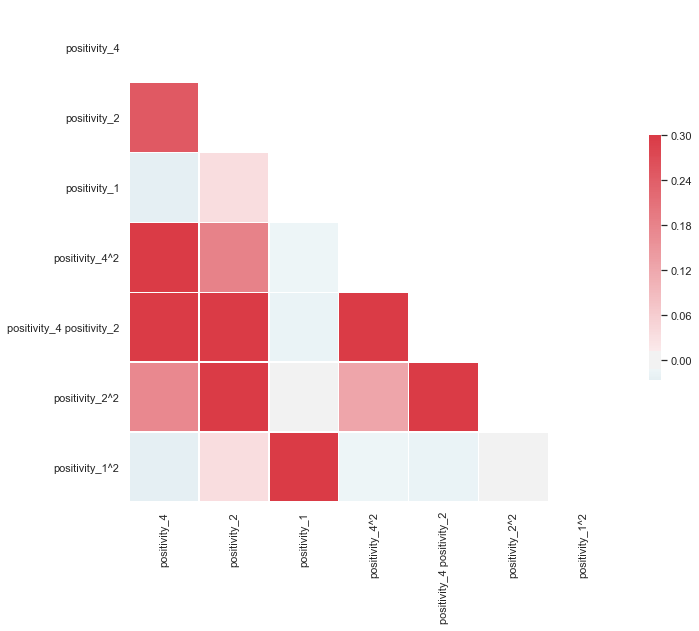

In [781]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [782]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [783]:
upper

,positivity_4,positivity_2,positivity_1,positivity_4^2,positivity_4 positivity_2,positivity_2^2,positivity_1^2
positivity_4,NaN,0.248891,0.026105,0.838825,0.428790,0.173316,0.026105
positivity_2,NaN,NaN,0.035040,0.182485,0.397713,0.866536,0.035040
positivity_1,NaN,NaN,NaN,0.011773,0.017680,0.009685,1.000000
positivity_4^2,NaN,NaN,NaN,NaN,0.500568,0.125797,0.011773
positivity_4 positivity_2,NaN,NaN,NaN,NaN,NaN,0.416286,0.017680
positivity_2^2,NaN,NaN,NaN,NaN,NaN,NaN,0.009685
positivity_1^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [784]:
to_drop

['positivity_1^2']

In [786]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

test = SelectKBest(score_func=mutual_info_regression, k=7)
fit = test.fit(features_selected_train, y_train)

features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype bool was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,positivity_4,positivity_2,positivity_1,positivity_4^2,positivity_4 positivity_2,positivity_2^2,positivity_1^2
0,0.665676,1.605882,-0.058824,0.443124,1.068996,2.578857,0.00346
1,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346
2,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346
3,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346
4,-0.443784,-0.414534,-0.058824,0.196944,0.183963,0.171838,0.00346


In [787]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=7)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype bool was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [788]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(features_selected_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [790]:
features_selected_test = features_64_test[features_selected_train.columns]

logreg_train_preds = logreg.predict(features_selected_train)
logreg_test_preds = logreg.predict(features_selected_test)

logreg_train_score = accuracy_score(y_train, logreg_train_preds)
logreg_test_score = accuracy_score(y_test, logreg_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(logreg_train_score, logreg_test_score))
print("F1 Score: {}".format(f1_score(y_test, logreg_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.5586 		 Testing Accuracy: 0.567
F1 Score: 0.5670103092783505


In [791]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier()

adaboost_clf.fit(features_selected_train, y_train)
adaboost_train_preds = adaboost_clf.predict(features_selected_train)
adaboost_test_preds = adaboost_clf.predict(features_selected_test)

adaboost_train_score = accuracy_score(y_train, adaboost_train_preds)
adaboost_test_score = accuracy_score(y_test, adaboost_test_preds)

print('AdaBoosting')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(adaboost_train_score, adaboost_test_score))
print("F1 Score: {}".format(f1_score(y_test, adaboost_test_preds, average='micro')))

AdaBoosting
Training Accuracy: 0.569 		 Testing Accuracy: 0.5567
F1 Score: 0.5567010309278351


In [792]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

lsvc_classifier = LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)

lsvc_classifier.fit(features_selected_train, y_train)
lsvc_train_preds = lsvc_classifier.predict(features_selected_train)
lsvc_test_preds = lsvc_classifier.predict(features_selected_test)

lsvc_train_score = accuracy_score(y_train, lsvc_train_preds)
lsvc_test_score = accuracy_score(y_test, lsvc_test_preds)

print('LinearSVC')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lsvc_train_score, lsvc_test_score))
print("F1 Score: {}".format(f1_score(y_test, lsvc_test_preds, average='micro')))

LinearSVC
Training Accuracy: 0.531 		 Testing Accuracy: 0.5876
F1 Score: 0.5876288659793815


In [798]:
from sklearn.model_selection import train_test_split, GridSearchCV

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [ ]:
from tpot import TPOTClassifier
# from tpot.config import tpot_config


classifier_config_dict = {

    

   

    'sklearn.svm.LinearSVC': {
        'penalty': ["l1", "l2"],
        'loss': ["hinge", "squared_hinge"],
        'dual': [True, False],
        'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
    }

}


tpot = TPOTClassifier(generations=10,
#                       config_dict=classifier_config_dict,
                      cv = 3 ,
#                       population_size=20,
                      max_eval_time_mins=7, 
                      verbosity=3,
                     periodic_checkpoint_folder='foldername1'
                     )


#we ran the classifier, which will tell us the best model to use.
tpot.fit(features_selected_train, y_train)
# tpot.export('filename.py')

30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _mate_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_r

In [751]:
# from pytrends.request import TrendReq

# pytrends = TrendReq(hl='en-US', tz=360)

In [752]:
# kw_list = ["buy microsoft stock"]
# pytrends.build_payload(kw_list, cat=0, timeframe='2016-12-14 2017-01-25', geo='US-NY', gprop='')

In [753]:
# pytrends.get_historical_interest(kw_list, day_end = 1)